# Assignment 1. Forward Kinematics
##  Antropomorphic elbow with a spherical wrist

## Elbow
![Image](https://drive.google.com/uc?export=view&id=17zG41RTwz8amP0VphfeS9KIdjZVnPH_0)


## Spherical wrist
![Image](https://drive.google.com/uc?export=view&id=1NzAcCwKtdXwueeBZS20bo7Jra0075qQn)


## Manipulator
![Image](https://drive.google.com/uc?export=view&id=1YTnHb9JNJHb5IChMIZxDhtwBxIIelD-w)


# Transformation matrices

The  rotation matrices are defined as follows:

$$R_x(\theta)=
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & \cos(\theta) & -\sin(\theta) & 0 \\
    0 & \sin(\theta) & \cos(\theta) & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

$$R_y(\theta)=
\begin{bmatrix}
    \cos(\theta) & 0 & \sin(\theta) & 0 \\
    0 & 1 & 0 & 0 \\
    -\sin(\theta) & 0 & \cos(\theta) & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

$$R_z(\theta)=
\begin{bmatrix}
    \cos(\theta) & -\sin(\theta) & 0 & 0 \\
    \sin(\theta) & \cos(\theta) & 0  & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

The translation matrices are defined as follows:

$$T_x(dx)=
\begin{bmatrix}
    1 & 0 & 0 & dx \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

$$T_y(dy)=
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & dy \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

$$T_z(dz)=
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    0 & 1 & 0 & 0 \\
    0 & 0 & 1 & dz \\
    0 & 0 & 0 & 1 \\
\end{bmatrix}$$

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [ ]:
def rotate_x(theta):
    cos_theta = sp.cos(theta)
    sin_theta = sp.sin(theta)
    rot_matrix_x = sp.Matrix([[1, 0, 0, 0],
                              [0, cos_theta, -sin_theta, 0],
                              [0, sin_theta, cos_theta, 0],
                              [0, 0, 0, 1]])
    return rot_matrix_x

def rotate_y(theta):
    cos_theta = sp.cos(theta)
    sin_theta = sp.sin(theta)
    rot_matrix_y = sp.Matrix([[cos_theta, 0, sin_theta, 0],
                              [0, 1, 0, 0],
                              [-sin_theta, 0, cos_theta, 0],
                              [0, 0, 0, 1]])
    return rot_matrix_y

def rotate_z(theta):
    cos_theta = sp.cos(theta)
    sin_theta = sp.sin(theta)
    rot_matrix_z = sp.Matrix([[cos_theta, -sin_theta, 0, 0],
                              [sin_theta, cos_theta, 0, 0],
                              [0, 0, 1, 0],
                              [0, 0, 0, 1]])
    return rot_matrix_z

def translate_x(dx):
    translation_matrix_x = sp.Matrix([[1, 0, 0, dx],
                                      [0, 1, 0, 0],
                                      [0, 0, 1, 0],
                                      [0, 0, 0, 1]])
    return translation_matrix_x

def translate_y(dy):
    translation_matrix_y = sp.Matrix([[1, 0, 0, 0],
                                      [0, 1, 0, dy],
                                      [0, 0, 1, 0],
                                      [0, 0, 0, 1]])
    return translation_matrix_y

def translate_z(dz):
    translation_matrix_z = sp.Matrix([[1, 0, 0, 0],
                                      [0, 1, 0, 0],
                                      [0, 0, 1, dz],
                                      [0, 0, 0, 1]])
    return translation_matrix_z


# Forward Kinematics

There are two approaches for solving forward kinematics problem:

## (1)
For this manipulator, consisting of an anthropomorphic arm with a spherical wrist,
the direct kinematics problem cannot be obtained by pure multiplication of transformation matrices ${}^0T_3$ and ${}^3T_6$ since
the elbow needs to coincide with the spherical wrist.
We need to transform from the final reference frame of the elbow to the base reference frame of the wrist.
So, one more transformation matrix has to be introduced, this matrix will describe transition between those two reference frames.

## (2)
We multiply all the transformation matrices - transitions between the reference frames.


### Let's solve the problem via Method 2 via `SymPy`
# **Symbolic solution**

In [ ]:
theta1, theta2, theta3, theta4, theta5, theta6, l1, l2, l3, l4, l5, l6, pi = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6 l1 l2 l3 l4 l5 l6 pi')


T_01 = rotate_z(theta1) * translate_z(l1) * rotate_z(sp.pi/2) * rotate_x(sp.pi/2)
T_12 = rotate_z(theta2) * translate_x(l2)
T_23 = rotate_z(theta3) * translate_x(l3) * rotate_y(sp.pi/2) * rotate_z(sp.pi/2)

T_34 = rotate_z(theta4) * translate_z(l4) * rotate_x(-sp.pi/2) * rotate_z(-sp.pi)
T_45 = rotate_z(theta5) * translate_y(l5) * rotate_x(-sp.pi/2)
T_56 = rotate_z(theta6) * translate_z(l6)


T1 = T_01*T_12*T_23*T_34*T_45*T_56
T1

Matrix([
[   ((-(sin(theta1)*sin(theta2)*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta2))*cos(theta4) - sin(theta4)*cos(theta1))*cos(theta5) + (sin(theta1)*sin(theta2)*sin(theta3) - sin(theta1)*cos(theta2)*cos(theta3))*sin(theta5))*cos(theta6) + ((sin(theta1)*sin(theta2)*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta2))*sin(theta4) - cos(theta1)*cos(theta4))*sin(theta6),    -((-(sin(theta1)*sin(theta2)*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta2))*cos(theta4) - sin(theta4)*cos(theta1))*cos(theta5) + (sin(theta1)*sin(theta2)*sin(theta3) - sin(theta1)*cos(theta2)*cos(theta3))*sin(theta5))*sin(theta6) + ((sin(theta1)*sin(theta2)*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta2))*sin(theta4) - cos(theta1)*cos(theta4))*cos(theta6),   -(-(sin(theta1)*sin(theta2)*cos(theta3) + sin(theta1)*sin(theta3)*cos(theta2))*cos(theta4) - sin(theta4)*cos(theta1))*sin(theta5) + (sin(theta1)*sin(theta2)*sin(theta3) - sin(theta1)*cos(theta2)*cos(theta3))*cos(theta5),     -l2*sin(theta1)*cos(theta2) 

In [ ]:
theta1, theta2, theta3, theta4, theta5, theta6, l1, l2, l3, l4, l5, l6 = sp.symbols('theta1 theta2 theta3 theta4 theta5 theta6 l1 l2 l3 l4 l5 l6')

T_01 = rotate_z(theta1) * translate_z(l1) * rotate_z(np.pi/2) * rotate_x(np.pi/2)
T_12 = rotate_z(theta2) * translate_x(l2)
T_23 = rotate_z(theta3) * translate_x(l3) * rotate_y(np.pi/2) * rotate_z(np.pi/2)

T_01*T_12*T_23

Matrix([
[(-(-1.0*sin(theta1) + 6.12323399573677e-17*cos(theta1))*sin(theta2) + (-3.74939945665464e-33*sin(theta1) - 6.12323399573677e-17*cos(theta1))*cos(theta2))*(3.74939945665464e-33*sin(theta3) + 1.0*cos(theta3)) + ((-1.0*sin(theta1) + 6.12323399573677e-17*cos(theta1))*cos(theta2) + (-3.74939945665464e-33*sin(theta1) - 6.12323399573677e-17*cos(theta1))*sin(theta2))*(-1.0*sin(theta3) + 3.74939945665464e-33*cos(theta3)) - 3.74939945665464e-33*sin(theta1) - 6.12323399573677e-17*cos(theta1), (-(-1.0*sin(theta1) + 6.12323399573677e-17*cos(theta1))*sin(theta2) + (-3.74939945665464e-33*sin(theta1) - 6.12323399573677e-17*cos(theta1))*cos(theta2))*(-6.12323399573677e-17*sin(theta3) + 6.12323399573677e-17*cos(theta3)) + ((-1.0*sin(theta1) + 6.12323399573677e-17*cos(theta1))*cos(theta2) + (-3.74939945665464e-33*sin(theta1) - 6.12323399573677e-17*cos(theta1))*sin(theta2))*(-6.12323399573677e-17*sin(theta3) - 6.12323399573677e-17*cos(theta3)) + 6.12323399573677e-17*sin(theta1) + 1.0*cos(theta1)

# **Numeric forward kinematics for different configurations**

In [ ]:
def rotate_x(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rot_matrix_x = np.array([[1, 0, 0, 0],
                             [0, cos_theta, -sin_theta, 0],
                             [0, sin_theta, cos_theta, 0],
                             [0, 0, 0, 1]])
    return rot_matrix_x

def rotate_y(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rot_matrix_y = np.array([[cos_theta, 0, sin_theta, 0],
                              [0, 1, 0, 0],
                              [-sin_theta, 0, cos_theta, 0],
                              [0, 0, 0, 1]])
    return rot_matrix_y

def rotate_z(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rot_matrix_z = np.array([[cos_theta, -sin_theta, 0, 0],
                              [sin_theta, cos_theta, 0, 0],
                              [0, 0, 1, 0],
                              [0, 0, 0, 1]])
    return rot_matrix_z

def translate_x(dx):
    translation_matrix_x = np.array([[1, 0, 0, dx],
                                     [0, 1, 0, 0],
                                     [0, 0, 1, 0],
                                     [0, 0, 0, 1]])
    return translation_matrix_x

def translate_y(dy):
    translation_matrix_y = np.array([[1, 0, 0, 0],
                                     [0, 1, 0, dy],
                                     [0, 0, 1, 0],
                                     [0, 0, 0, 1]])
    return translation_matrix_y

def translate_z(dz):
    translation_matrix_z = np.array([[1, 0, 0, 0],
                                     [0, 1, 0, 0],
                                     [0, 0, 1, dz],
                                     [0, 0, 0, 1]])
    return translation_matrix_z

In [ ]:
# Define a function to make the values of the matrix to be within the tolerance
def validate_matrix(matrix):

    tolerance = 1e-12
    def is_close_to_zero(value):
        return abs(value) < tolerance

    # Iterate through each element in the matrix
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            # If the element is close to zero, set it to zero
            if is_close_to_zero(matrix[i][j]):
                matrix[i][j] = 0

class Manipulator:
    def __init__(self, l, m=None):
        self.l = l
        self.m = m
        self.q = None

    def set_config(self, q_):
        if self.q is None:
            self.q = q_ if isinstance(q_, list) else [q_]
        else:
            self.q.extend(q_ if isinstance(q_, list) else [q_])

    def get_config(self):
        return self.q

    def get_config_in_pi(self):
        return [str(q_ / np.pi) + "pi" for q_ in self.q]

def solve_forward_kinematics(manipulator):
    configurations = manipulator.get_config()
    if configurations is None:
        print("ERROR. Set the configuration!")
        return None

    forward_kinematics_results = []
    for config in configurations:
        theta1, theta2, theta3, theta4, theta5, theta6 = config
        l1, l2, l3, l4, l5, l6 = manipulator.l

        T_0 = np.identity(4)
        T_01 = rotate_z(theta1) @ translate_z(l1) @ rotate_z(np.pi/2) @ rotate_x(np.pi/2)
        T_12 = rotate_z(theta2) @ translate_x(l2)
        T_23 = rotate_z(theta3) @ translate_x(l3) @ rotate_y(np.pi/2) @ rotate_z(np.pi/2)
        T_34 = rotate_z(theta4) @ translate_z(l4) @ rotate_x(-np.pi/2) @ rotate_z(-np.pi)
        T_45 = rotate_z(theta5) @ translate_y(l5) @ rotate_x(-np.pi/2)
        T_56 = rotate_z(theta6) @ translate_z(l6)

        f_k_transform = T_0 @ T_01 @ T_12 @ T_23 @ T_34 @ T_45 @ T_56
        validate_matrix(f_k_transform)

        forward_kinematics_results.append(f_k_transform)

    return forward_kinematics_results

In [ ]:
# Example of usage
l = [0.3, 0.5, 0.3, 0.5, 0.3, 0.1]
manipulator = Manipulator(l)

config0 = [np.pi/2, 0, 0, 0, 0, 0]
config1 = [np.pi/2, 0, 0, 0, np.pi/3, 0]
config2 = [-np.pi/3, 0, np.pi/3, np.pi/6, -np.pi/12, 0]

configs = [config0, config1, config2]
manipulator.set_config(configs)

solve_forward_kinematics(manipulator)

[array([[ 0. ,  0. , -1. , -1.7],
        [ 0. , -1. ,  0. ,  0. ],
        [-1. ,  0. ,  0. ,  0.3],
        [ 0. ,  0. ,  0. ,  1. ]]),
 array([[-0.8660254 ,  0.        , -0.5       , -1.5       ],
        [ 0.        , -1.        ,  0.        ,  0.        ],
        [-0.5       ,  0.        ,  0.8660254 ,  0.64641016],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 array([[ 0.27383384, -0.8080127 ,  0.52166129,  0.98808738],
        [ 0.71577558,  0.53349365,  0.45061053,  0.63024421],
        [-0.64240202,  0.25      ,  0.72444437,  1.28259807],
        [ 0.        ,  0.        ,  0.        ,  1.        ]])]

# **Simulation**

In [ ]:
# Retrieve transformation matrices

def get_frames(q, manipulator=None):

  trans_matrices = []
  (theta1, theta2, theta3, theta4, theta5, theta6) = q
  l1, l2, l3, l4, l5, l6 = manipulator.l

  T_0 = np.identity(4)
  trans_matrices.append(T_0)
  T_01 = rotate_z(theta1) @ translate_z(l1) @ rotate_z(np.pi/2) @ rotate_x(np.pi/2)
  trans_matrices.append(T_01)

  T_12 = rotate_z(theta2) @ translate_x(l2)
  trans_matrices.append(T_12)

  T_23 = rotate_z(theta3) @ translate_x(l3) @ rotate_y(np.pi/2) @ rotate_z(np.pi/2)
  trans_matrices.append(T_23)

  T_34 = rotate_z(theta4) @ translate_z(l4) @ rotate_x(-np.pi/2) @ rotate_z(-np.pi)
  trans_matrices.append(T_34)

  T_45 = rotate_z(theta5) @ translate_y(l5) @ rotate_x(-np.pi/2)
  trans_matrices.append(T_45)

  T_56 = rotate_z(theta6) @ translate_z(l6)
  trans_matrices.append(T_56)

  transformation = np.identity(4)

  frames = []
  for i in range(len(trans_matrices)):
      transformation = transformation @ trans_matrices[i]
      validate_matrix(transformation)
      frames.append(transformation)

  return frames



In [ ]:
# Define functions for plotting

def extract_plot_points_for_each_link(transf_matrices):
  xs, ys, zs = [],[],[]
  for transf_matrix in transf_matrices:
    x,y,z = transf_matrix[0:3,3]
    xs.append(x)
    ys.append(y)
    zs.append(z)

  return xs,ys,zs

def extract_vectors_from_transf_matrix(transf_matrix):
    x,y,z = transf_matrix[0:3,3]
    p = [x,y,z]
    v1 = transf_matrix[0:3,0]
    v2 = transf_matrix[0:3,1]
    v3 = transf_matrix[0:3,2]

    return p, [v1,v2,v3]

# extract_vectors_from_transf_matrix(solution1)
def plot_arrow(ax, p,v,color):
  x,y,z = p
  u,v,w = v
  ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True,color=color)

def plot_frame(ax, trans):
  p,vs = extract_vectors_from_transf_matrix(trans)

  colors = ['r', 'g', 'b']

  for i in range(3):
    plot_arrow(ax, p , vs[i], colors[i])


### Plotting multiple configurations of the manipulator

Note that the  first 6 frames represent the joints' frames. The last - 7th frame is the end-effector's frame.

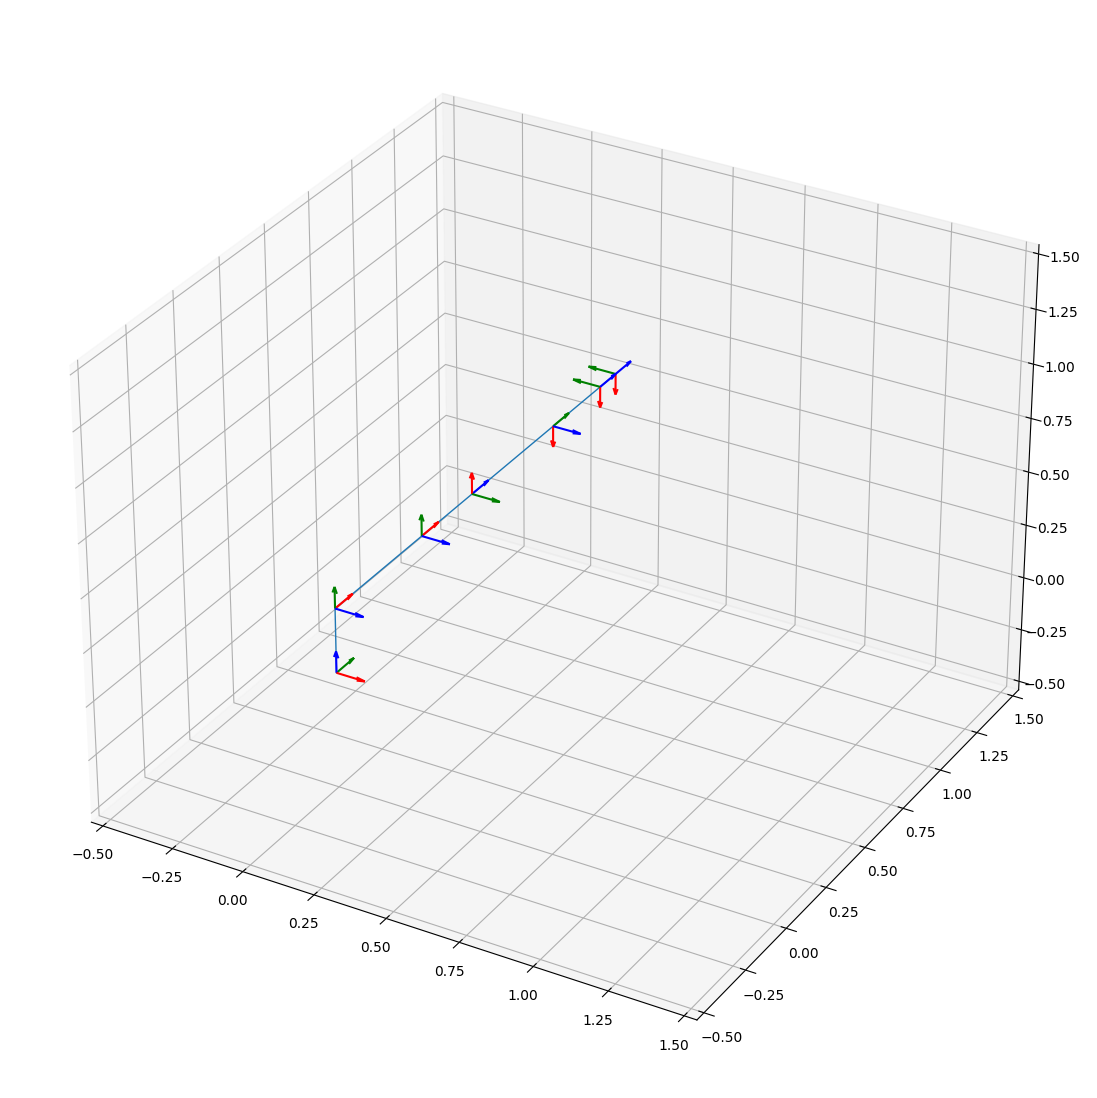

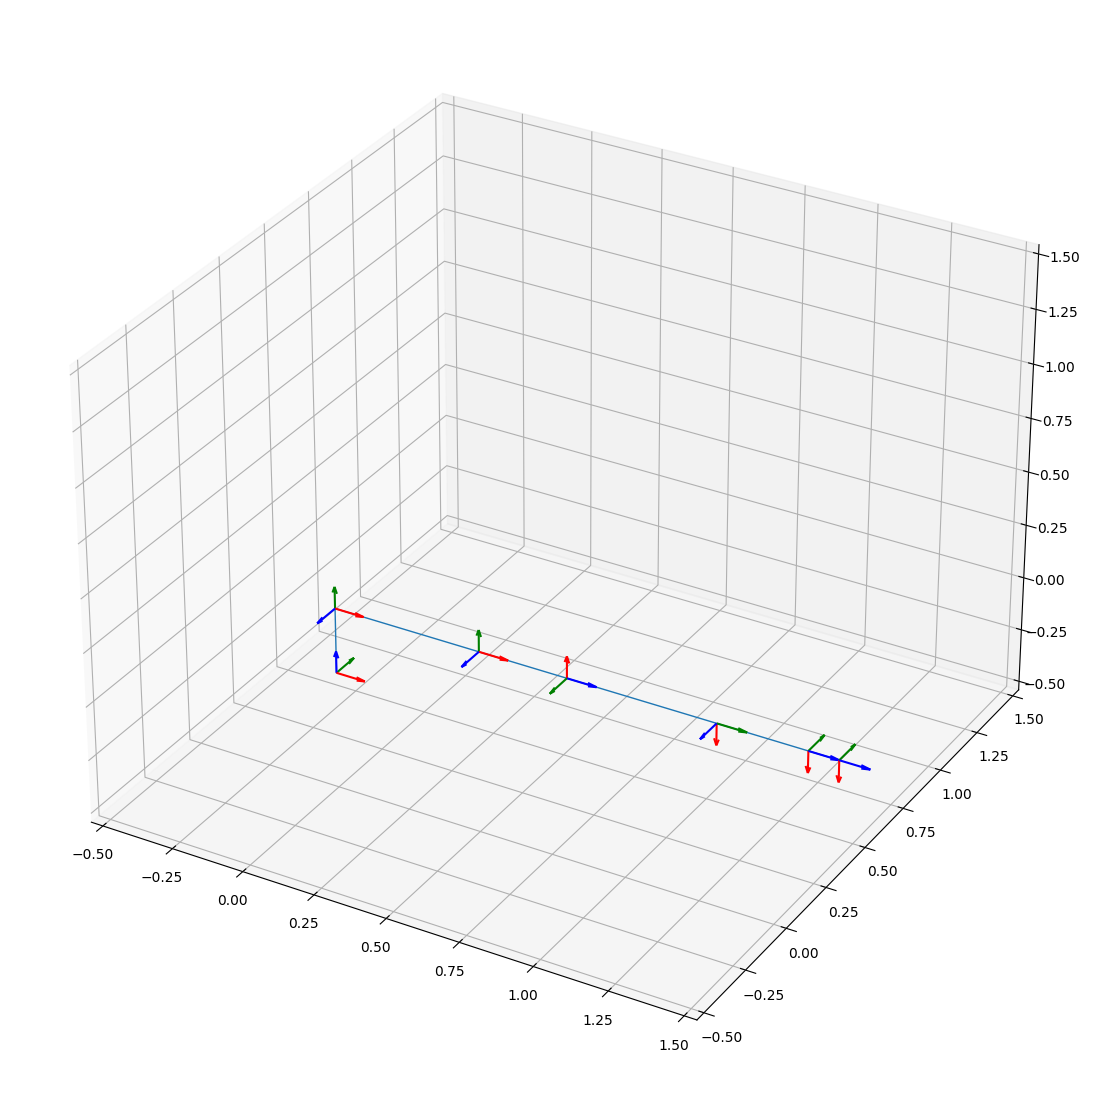

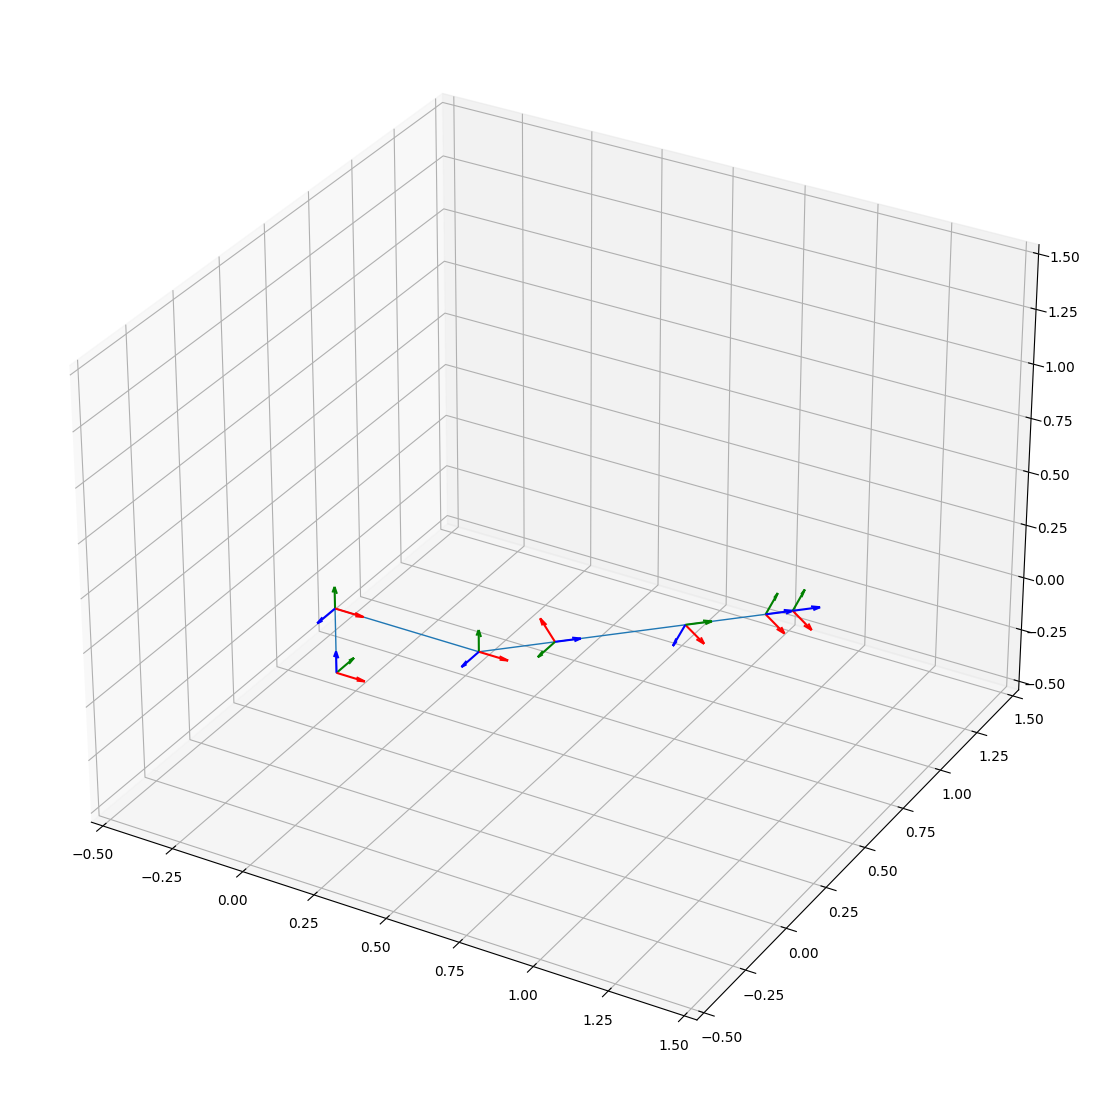

In [ ]:
def plot_manipulator_multiple(configurations):
    for config in configurations:
        frames = get_frames(config, manipulator)

        fig = plt.figure(figsize=(14, 14))
        ax = fig.add_subplot(111, projection='3d')

        for frame in frames:
            plot_frame(ax, frame)

        xs, ys, zs = extract_plot_points_for_each_link(frames)
        ax.plot(xs, ys, zs, linewidth=1)

        ax.set_xlim3d([-0.5, 1.5])
        ax.set_ylim3d([-0.5, 1.5])
        ax.set_zlim3d([-0.5, 1.5])

        plt.show()

configurations = [
    [0, 0, 0, 0, 0, 0],
    [-np.pi/2, 0, 0, 0, 0, 0],
    [-np.pi/2, 0, np.pi/6, np.pi/12, 0, 0]
]

plot_manipulator_multiple(configurations)
